# Exploring Kaggle Diabetic Retinopathy datasets

Download the dataset from the Kaggle page and store them under `inputs` folder.

References:
- https://www.kaggle.com/c/diabetic-retinopathy-detection

## Diabetic Retinopathy

> People with diabetes can have an eye disease called diabetic retinopathy. This is when high blood sugar levels cause damage to blood vessels in the retina. These blood vessels can swell and leak. Or they can close, stopping blood from passing through. Sometimes abnormal new blood vessels grow on the retina. All of these changes can steal your vision.

https://www.aao.org/eye-health/diseases/what-is-diabetic-retinopathy

### Severity Scale

- 0 - No DR
- 1 - Mild
- 2 - Moderate
- 3 - Severe
- 4 - Proliferative DR

References:
- http://webeye.ophth.uiowa.edu/eyeforum/tutorials/Diabetic-Retinopathy-Med-Students/Classification.htm
- http://arleoeye.com/services/common-eye-disorders/diabetic-retinopathy/
- http://www.icoph.org/downloads/Diabetic-Retinopathy-Scale.pdf

In [1]:
import pandas as pd
from glob import glob
import os
import cv2
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

input_path = "../input/"

## Load the annotations (ground truth labels)

In [2]:
def load_df(path):    
    def get_filename(image_id):
        return os.path.join(input_path, "train", image_id + ".jpeg")

    df_node = pd.read_csv(path)
    df_node["file"] = df_node["image"].apply(get_filename)
    df_node = df_node.dropna()
    
    return df_node

df = load_df(os.path.join(input_path, "trainLabels.csv"))
len(df)

df.head()

,image,level,file
0,10_left,0,../input/train/10_left.jpeg
1,10_right,0,../input/train/10_right.jpeg
2,13_left,0,../input/train/13_left.jpeg
3,13_right,0,../input/train/13_right.jpeg
4,15_left,1,../input/train/15_left.jpeg


## Plot the retina images

In [3]:
import math

def get_filelist(level=0):
    return df[df['level'] == level]['file'].values

def subplots(filelist):
    plt.figure(figsize=(16, 12))
    ncol = 3
    nrow = math.ceil(len(filelist) // ncol)
    
    for i in range(0, len(filelist)):
        plt.subplot(nrow, ncol, i + 1)
        img = cv2.imread(filelist[i])
        plt.imshow(img)

### Severity 0: No DR

> No abnormalities

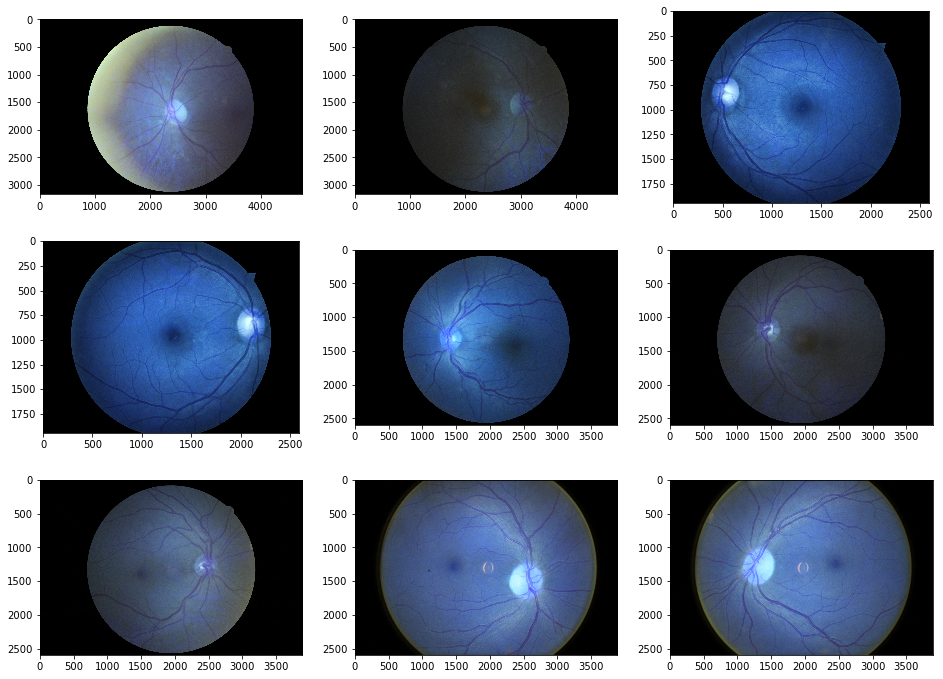

In [4]:
filelist = get_filelist(level=0)
subplots(filelist[:9])

### Severity 1: Mild

> Microaneurysms only

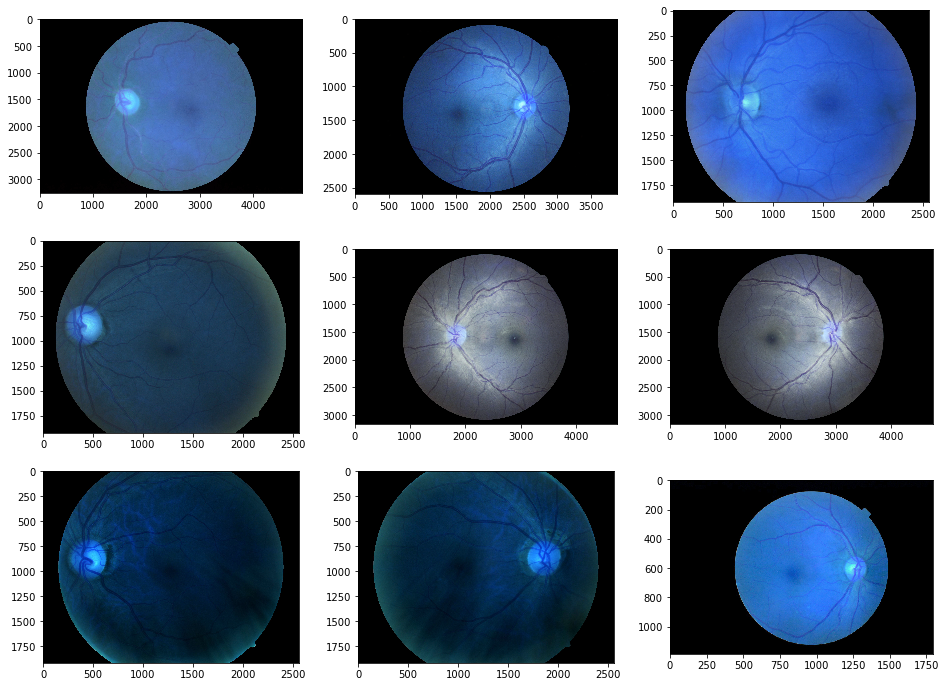

In [5]:
filelist = get_filelist(level=1)
subplots(filelist[:9])

### Severity 2: Moderate

> More than just microaneurysms but less than Severe NPDR

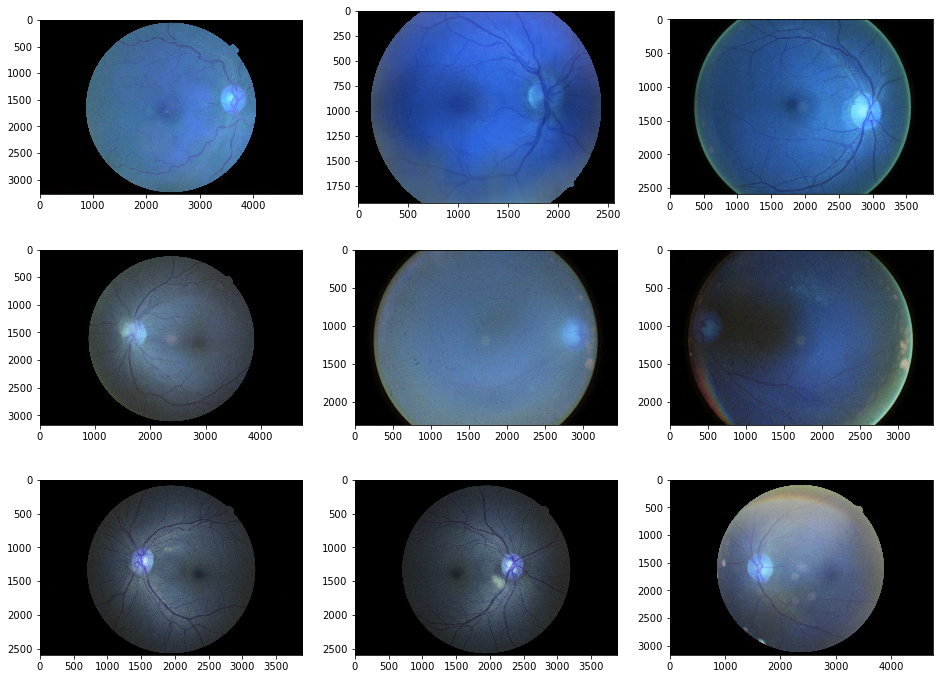

In [6]:
filelist = get_filelist(level=2)
subplots(filelist[:9])

### Severity 3: Severe

> Any of the following:
- More than 20 intraretinal hemorrhages in each of 4
quadrants
- Definite venous beading in 2+ quadrants
- Prominent IRMA in 1+ quadrant
And no signs of proliferative retinopathy 

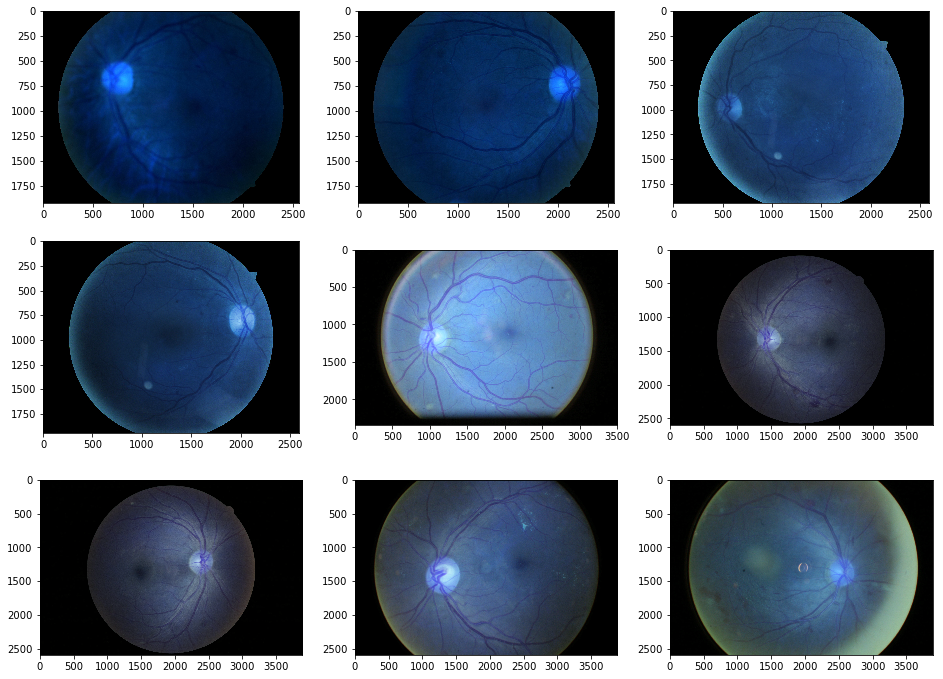

In [7]:
filelist = get_filelist(level=3)
subplots(filelist[:9])

### Severity 4: Proliferative DR

> One or more of the following:
- Neovascularization
- Vitreous/preretinal hemorrhage 

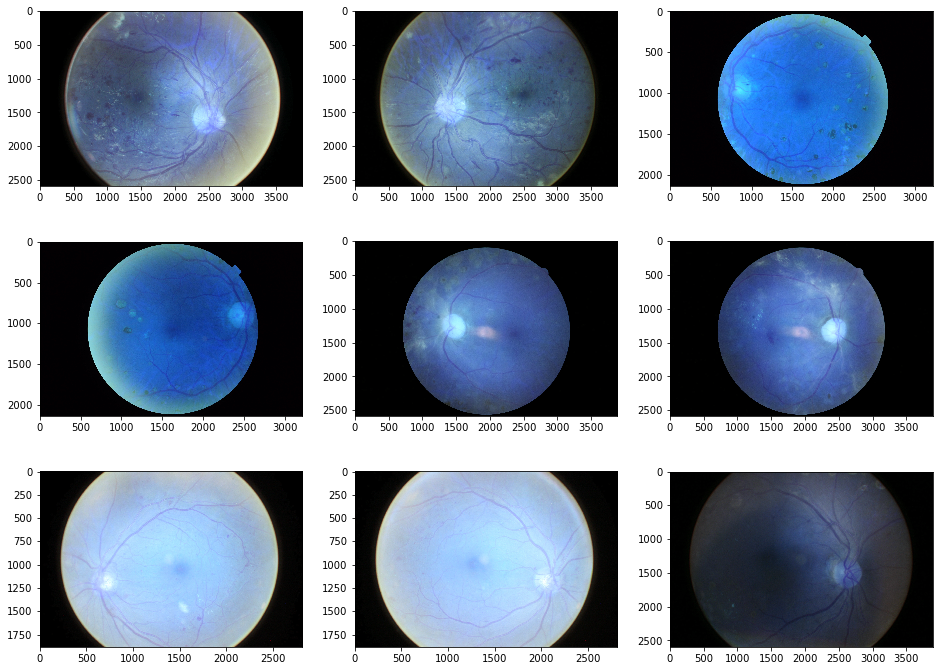

In [8]:
filelist = get_filelist(level=4)
subplots(filelist[:9])

### Class imbalance

In [9]:
Counter(df['level'])

Counter({0: 25810, 1: 2443, 2: 5292, 3: 873, 4: 708})

(array([ 25810.,   2443.,   5292.,    873.,    708.]),
 array([ 0. ,  0.8,  1.6,  2.4,  3.2,  4. ]),
 <a list of 5 Patch objects>)

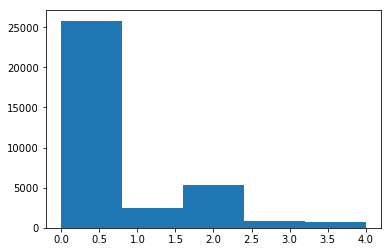

In [10]:
plt.hist(df['level'], bins=5)